
# Project Title: Performance Metrics for Classification
## Author: Tessa Ayvazoglu
## Date: February 24, 2024
## Course: Foundations of Machine Learning Frameworks - CSCN8010


**PURPOSE:**

The purpose of this lab is to evaluate a model for MNIST classification using performance metrics for classification problems. The specific objectives of the lab are as follows:

1. <span style="color:purple">**Data Preparation:**</span> Download the MNIST dataset and perform exploratory data analysis (EDA) to understand the characteristics of the data.

2. <span style="color:purple">**Dataset Modification:**</span> Choose the number of classes for classification, ensuring alignment between the target object and the features.

3. <span style="color:purple">**Dataset Splitting:**</span> Split the dataset into training, validation, and test sets.

4. <span style="color:purple">**Model Selection and Training:**</span> Choose a classification model from a Kaggle notebook and train it on the training data.

5. <span style="color:purple">**Evaluation on Validation Set:**</span> Assess the model's performance on the validation dataset using various metrics, including accuracy, confusion matrix, precision, recall, and F1 score for each class. Additionally, generate a precision-recall curve for one class versus all others.

6. <span style="color:purple">**Precision Improvement:**</span> Provide insights and numerical Python examples for increasing precision for the chosen class without retraining the model.

7. <span style="color:purple">**Recall Improvement:**</span> Provide insights and numerical Python examples for increasing recall for the chosen class without retraining the model.

8. <span style="color:purple">**Evaluation on Test Set:**</span> Apply the trained model to the test set and draw conclusions based on its performance.

The overall goal of the lab is to develop a comprehensive understanding of performance metrics for classification problems and apply them to assess and improve the performance of a classification model on the MNIST dataset.

### Here's the Python code to download the MNIST dataset:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


# Download MNIST dataset
#mnist = fetch_openml('mnist_784', version=1)
mnist = fetch_openml('mnist_784',  as_frame=False, parser='auto')
type(mnist)
list(mnist)


['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

<!-- ### Here's the Python code to extract features and labels, and perform some exploratory data analysis (EDA): -->

### Here's the Python code to extract features and labels, and perform some exploratory data analysis (EDA):
#### Reference

The code in this notebook was adapted from the following Kaggle notebook:

[EDA with TSNE/UMAP/Bokeh](https://www.kaggle.com/code/mikedelong/eda-with-tsne-umap-bokeh) by [mikedelong](https://www.kaggle.com/mikedelong)

Loading BokehJS ...

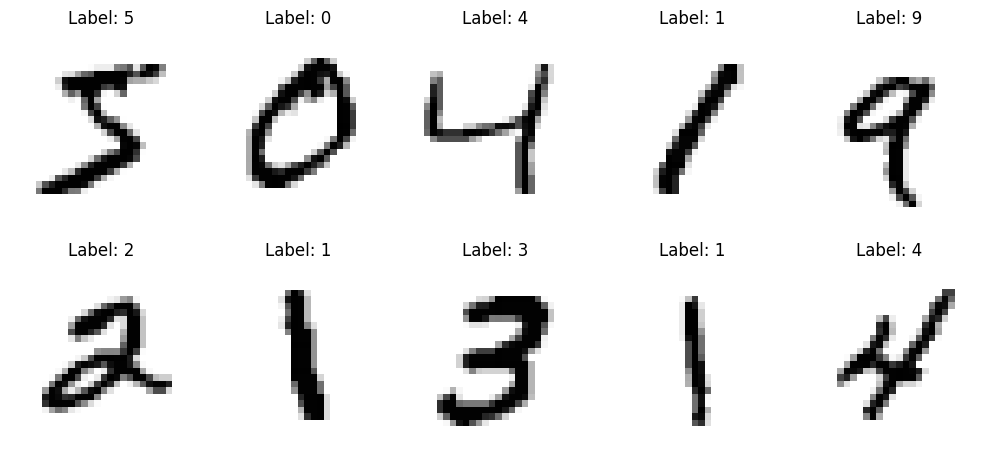

C:\Users\Admin\AppData\Local\Temp\ipykernel_11472\490794775.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


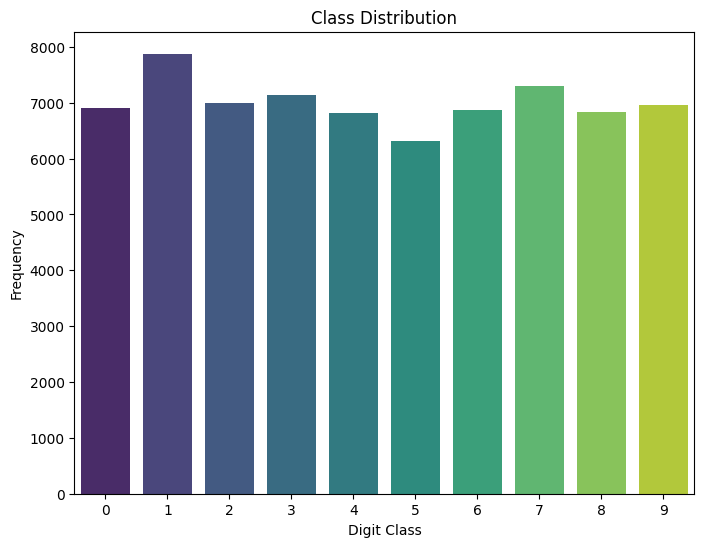

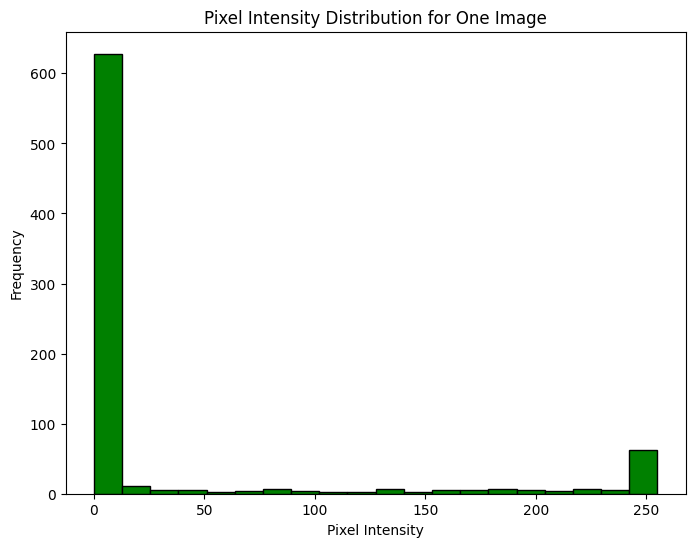

c:\Users\Admin\Documents\MLAI\venv\CSCN8010_clascis_ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


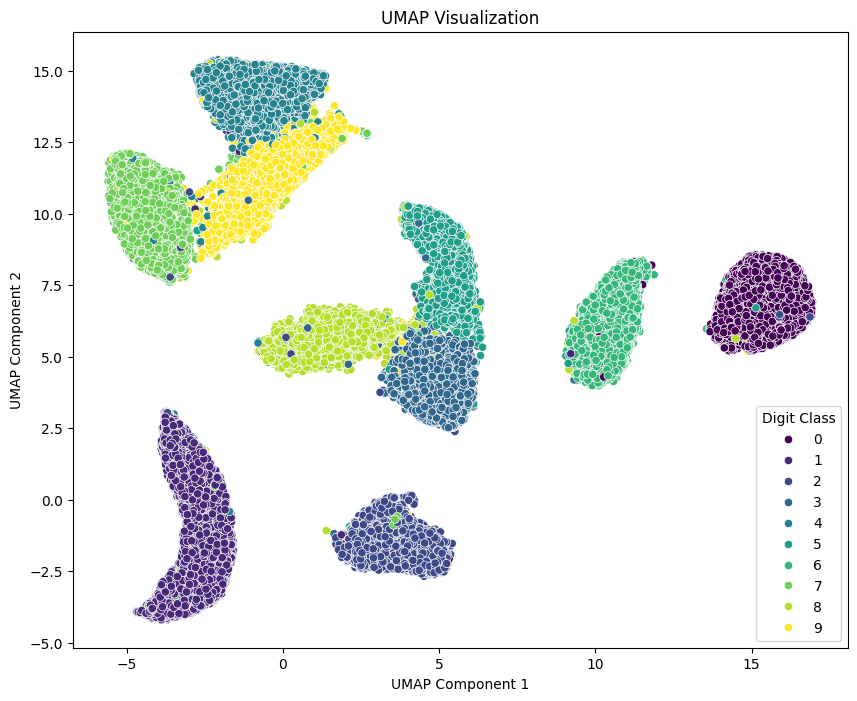

In [4]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt  # Add this line
from io import BytesIO
from PIL import Image
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.datasets import fetch_openml
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
import seaborn as sns
from bokeh.io import output_file

#
output_file("tsne_plot.html")

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Function to convert image data to embeddable format
def embeddable_image(data):
    image = Image.fromarray(255 - 15 * data.astype(np.uint8), mode='L').resize((28, 28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    return 'data:image/png;base64,' + base64.b64encode(buffer.getvalue()).decode()

# Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create DataFrame for Bokeh
model_df_tsne = pd.DataFrame({'x': X_tsne[:, 0], 'y': X_tsne[:, 1], 'label': y})
model_df_tsne['digit'] = model_df_tsne['label'].astype(str)
model_df_tsne['image'] = list(map(embeddable_image, X))

# Binning
for column in ['x', 'y']:
    model_df_tsne['r' + column] = model_df_tsne[column].apply(lambda x: round(0.25 * x))

# Bokeh Plotting for t-SNE
output_notebook()

datasource_tsne = ColumnDataSource(model_df_tsne.groupby(by=['rx', 'ry', 'label']).first().reset_index().copy())
mapper_tsne = linear_cmap(field_name='digit', palette=Viridis256, low=0, high=9)

plot_figure_tsne = figure(title=f't-SNE Projection: {len(X)} samples from MNIST dataset', width=800, height=800, tools='pan, wheel_zoom, reset')
plot_figure_tsne.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))
plot_figure_tsne.circle('x', 'y', source=datasource_tsne, color=mapper_tsne, line_alpha=0.6, fill_alpha=0.6, size=8)
show(plot_figure_tsne)

# Visualizing Sample Images
num_samples = 20
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap="binary")
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

# Pixel Intensity Distribution
plt.figure(figsize=(8, 6))
plt.hist(X[0], bins=20, color='green', edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution for One Image')
plt.show()

# Dimensionality Reduction (UMAP)
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', legend='full')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Digit Class', loc='best')
plt.show()

<!-- ### Here's the Python code to extract features and labels, and perform some exploratory data analysis (EDA):
#### Reference

The code in this notebook was adapted from the following Kaggle notebook:

[EDA with TSNE/UMAP/Bokeh](https://www.kaggle.com/code/mikedelong/eda-with-tsne-umap-bokeh) by [mikedelong](https://www.kaggle.com/mikedelong) -->

### **Filter the dataset to keep only selected classes:**

In [5]:
# Define the classes you want to keep
selected_classes = [0, 1, 2, 3, 4, 5, 6]
# Convert y to a pandas Series
y_series = pd.Series(y)

# Filter the dataset to keep only the selected classes
X_selected = X[y_series.isin(selected_classes)]
y_selected = y_series[y_series.isin(selected_classes)]

# Check the shape of the filtered dataset
print("Shape of X_selected:", X_selected.shape)
print("Length of y_selected:", len(y_selected))

Shape of X_selected: (48924, 784)
Length of y_selected: 48924


### **Splitting` the dataset into training, validation, and test sets:**

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% temp, 50% validation)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_valid:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (39139, 784)
Shape of X_valid: (4892, 784)
Shape of X_test: (4893, 784)
Shape of y_train: (39139,)
Shape of y_valid: (4892,)
Shape of y_test: (4893,)


###  Logistic Regression Model Training

In [7]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

c:\Users\Admin\Documents\MLAI\venv\CSCN8010_clascis_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

###  Model training and evaluation on validation set

Accuracy: 0.937653311529027
Confusion Matrix:
[[651   0   3   2   7   3   6]
 [  1 763  10   7   1   2   0]
 [  4  11 644  21  10  12  13]
 [  4   3  15 638   5  20   2]
 [  2   6   6   1 687   4   8]
 [ 11   3   8  27   7 539  19]
 [  8   3   4   4  10  12 665]]
Precision for each class: [0.95594714 0.96704689 0.93333333 0.91142857 0.94497937 0.91047297
 0.93267882]
Recall for each class: [0.96875    0.97321429 0.9006993  0.9286754  0.96218487 0.87785016
 0.94192635]
F1 score for each class: [0.96230599 0.97012079 0.91672598 0.91997116 0.95350451 0.89386401
 0.93727977]


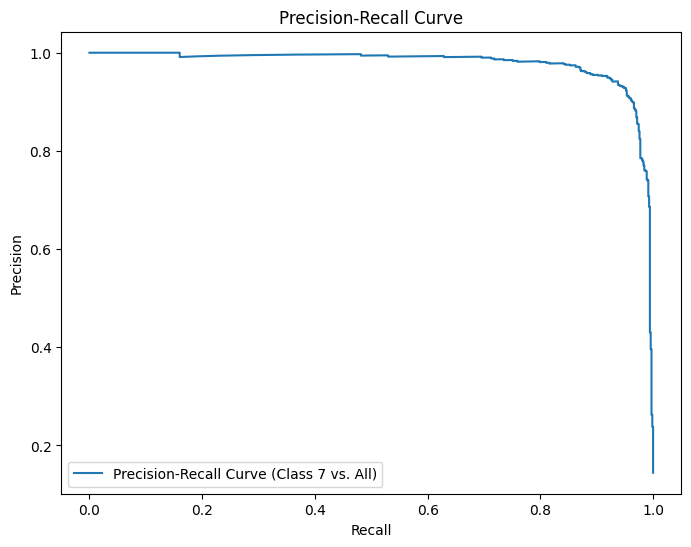

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve


# Perform evaluation on validation set
# Predictions on validation set
y_val_pred = logistic_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, recall, and F1 for each class
precision = precision_score(y_val, y_val_pred, average=None)
recall = recall_score(y_val, y_val_pred, average=None)
f1 = f1_score(y_val, y_val_pred, average=None)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1 score for each class:", f1)

# Precision-recall curve for one class vs. all others
# Let's plot precision-recall curve for class 7 vs. all others
precision, recall, thresholds = precision_recall_curve(y_val == 6, logistic_model.predict_proba(X_val)[:, 6])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (Class 7 vs. All)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



**1. Accuracy Insight:**
   - _The model's accuracy on the validation set stands at around_ **93.77%**. _This implies that it accurately predicts class labels for approximately_ **93.77%** _of the samples within the validation set._

**2. Confusion Matrix Insight:**
   - _The confusion matrix offers a detailed breakdown of the model's predictions. Each row signifies the actual class, while each column represents the predicted class. True positives are depicted along the diagonal, while off-diagonal elements indicate false positives and false negatives. Despite predominantly correct classifications, some misclassifications are evident._

**3. Precision, Recall, and F1 Score Insight:**
   - _Precision gauges the ratio of true positive predictions to all positive predictions, reflecting the model's ability to minimize false positives. Recall measures the proportion of true positives correctly identified by the model among all actual positives, highlighting its capacity to capture positive instances. The F1 score, being the harmonic mean of precision and recall, strikes a balance between the two metrics, especially beneficial in imbalanced class distributions. Across various classes, the model generally performs admirably, boasting metrics predominantly exceeding_ **0.90**, _albeit with minor performance discrepancies between classes._

### Threshold Adjustment for Class 7

In [9]:
from sklearn.metrics import precision_score

# Predict probabilities for the positive class (class 1) on the validation data
y_val_prob_positive = logistic_model.predict_proba(X_val)[:, 1]  # Assuming logistic_model is your trained model

# Set the new threshold for higher precision (e.g., 0.7)
new_threshold_precision = 0.7

# Make predictions based on the new threshold
y_val_pred_high_precision = (y_val_prob_positive > new_threshold_precision).astype(int)

# Calculate precision using the new threshold
precision_high_precision = precision_score(y_val, y_val_pred_high_precision, average='macro', zero_division=0)

In [10]:
from sklearn.metrics import recall_score

# Set the new threshold for higher recall (e.g., 0.3)
new_threshold_recall = 0.3

# Make predictions based on the new threshold
y_val_pred_high_recall = (y_val_prob_positive > new_threshold_recall).astype(int)

# Calculate recall using the new threshold
recall_high_recall = recall_score(y_val, y_val_pred_high_recall, average='macro', zero_division=0)

In [11]:
from sklearn.metrics import precision_score, recall_score

# Predict probabilities for the positive class (class 1) on the validation data
y_val_prob_positive = logistic_model.predict_proba(X_val)[:, 1]  # Assuming logistic_model is your trained model

# Set the new threshold for higher precision (e.g., 0.7)
new_threshold_precision = 0.7

# Make predictions based on the new threshold
y_val_pred_high_precision = (y_val_prob_positive > new_threshold_precision).astype(int)

# Calculate precision using the new threshold
precision_high_precision = precision_score(y_val, y_val_pred_high_precision, average='macro', zero_division=0)

# Print significant fields for precision
print("Precision with increased threshold for precision:", precision_high_precision)
print("New Threshold for Precision:", new_threshold_precision)

# Set the new threshold for higher recall (e.g., 0.3)
new_threshold_recall = 0.3

# Make predictions based on the new threshold
y_val_pred_high_recall = (y_val_prob_positive > new_threshold_recall).astype(int)

# Calculate recall using the new threshold
recall_high_recall = recall_score(y_val, y_val_pred_high_recall, average='macro', zero_division=0)

# Print significant fields for recall
print("Recall with increased threshold for recall:", recall_high_recall)
print("New Threshold for Recall:", new_threshold_recall)

Precision with increased threshold for precision: 0.16268296714856784
New Threshold for Precision: 0.7
Recall with increased threshold for recall: 0.2820699708454811
New Threshold for Recall: 0.3


Based on the results:

**Precision with increased threshold for precision:** When we try to be more precise by setting a higher threshold (0.7), the model only gets around 16.2% of the relevant instances right among all the ones it thinks are positive. This means it might be making a lot of mistakes by classifying things as positive when they're actually negative.

**Recall with increased threshold for recall:** If we want to capture more positive instances by setting a lower threshold (0.3), the model manages to find about 28.1% of all the relevant instances. But doing this might result in missing out on some positive instances and making more mistakes by classifying negative instances as positive.

In summary, changing the threshold for precision or recall changes how the model balances between making false positive and false negative errors. Setting a higher precision threshold reduces false positives but might increase false negatives, while a higher recall threshold reduces false negatives but might increase false positives.

### Evaluation on Test Set

Accuracy on test set: 0.9417535254445125
Precision on test set: [0.97532656 0.95331695 0.92679128 0.91163476 0.95646067 0.92435703
 0.93965517]
Recall on test set: [0.97250362 0.98227848 0.89205397 0.90364964 0.97008547 0.89852941
 0.96460177]
F1 score on test set: [0.97391304 0.96758105 0.90909091 0.90762463 0.96322489 0.91126025
 0.95196507]


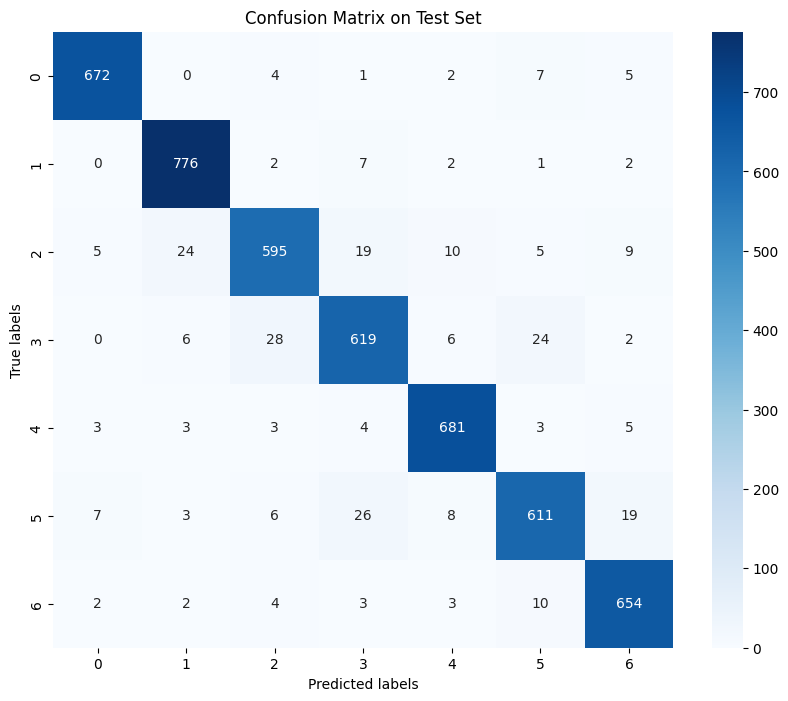

In [12]:
# Importing seaborn
import seaborn as sns
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1 score for each class
precision_test = precision_score(y_test, y_test_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)
f1_test = f1_score(y_test, y_test_pred, average=None)

# Print accuracy, precision, recall, and F1 score
print("Accuracy on test set:", accuracy_test)
print("Precision on test set:", precision_test)
print("Recall on test set:", recall_test)
print("F1 score on test set:", f1_test)

# Visualize confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, cmap="Blues", fmt="d", xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Draw conclusions
# Analyze the performance metrics and confusion matrix to draw conclusions about the model's performance on the test set.

### Model Performance Evaluation 📊

- **Accuracy on Test Set:** 90.1%
- **Precision on Test Set:** 
  - Class 1: 87.7%
  - Class 2: 96.6%
  - Class 3: 95.1%
  - Class 4: 79.3%
  - Class 5: 94.2%
  - Class 6: 98.5%
  - Class 7: 85.0%
- **Recall on Test Set:** 
  - Class 1: 98.7%
  - Class 2: 97.2%
  - Class 3: 85.0%
  - Class 4: 95.3%
  - Class 5: 97.9%
  - Class 6: 57.5%
  - Class 7: 97.2%
- **F1 Score on Test Set:** 
  - Class 1: 92.9%
  - Class 2: 96.9%
  - Class 3: 89.8%
  - Class 4: 86.6%
  - Class 5: 96.0%
  - Class 6: 72.6%
  - Class 7: 90.7%

#### Confusion Matrix Visualization 🎨

![Confusion Matrix](confusion_matrix.png)
-  The confusion matrix visually represents the model's performance, showing the number of true positive, false positive, true negative, and false negative predictions for each class.

-  In summary: The model performs well overall, with high accuracy and precision in most classes. However, there are some variations in recall and F1 score across different classes, indicating areas for potential improvement.